# Getting data for southern spain

*This lesson has been written by Simon M. Mudd at the University of Edinburgh*

*Last update 18/02/2021*

In this notebook we will grab some data from southern Spain using a python package called `lsdviztools`. 
We also will do a little bit of topographic analysis using **lsdtopotools**.

We are assuming you are on a Notable notebook via the University of Edinburgh's Learn pages. This already has **lsdtopotools** installed. If this is not the case, you will need to use conda to install that yourself. 

## Get the right python packages

In [1]:
!pip install lsdviztools utm

In [2]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw
import pandas as pd
import geopandas as gpd
import cartopy as cp
import cartopy.crs as ccrs
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

## Now grab some data

First, we need to grab some data. We use a tool in `lsdviztools.lsdbasemaptools` called the `ot_scraper` (`ot` is for opentopography.org).

You can tell this what sort of data you want (most people will use the SRTM 30 metre data) and you also tell it the lower left and the upper right corners, using latitude and longitude. You can get these from goole earth by right clicking on the map and selecting "what's here". In this example below, I will just get a small area near Sorbas. But you might expand your search area. 

In [3]:
# If you want to modify the DEM, change the bounding latitude and longitude. 
Sorbas_DEM = bmt.ot_scraper(source = "SRTM30",longitude_W = -2.3, longitude_E = -2, 
                            latitude_S = 37.1, latitude_N = 37.25,prefix = "Sorbas")
Sorbas_DEM.print_parameters()
Sorbas_DEM.download_pythonic()

The source is: SRTM30
The west longitude is: -2.3
The east longitude is: -2
The south latitude is: 37.25
The north latitude is: 37.1
The path is: ./
The prefix is: Sorbas
I am going to download the following for you:
https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1&south=37.1&north=37.25&west=-2.3&east=-2&outputFormat=GTiff
This might take a little while, depending on the size of the file. 
Finished downloading


('./Sorbas_SRTM30.tif', './', 'Sorbas_SRTM30.tif')

That just downloaded a .tif file, which you could look at in a GIS. 
You can also look at the raw data here in python using something called `rasterio`. 

But we will use some tools developed at the University of Edinburgh, called **lsdtopotools**, to look at the data. 

To do that, we need to convert the data into a format **lsdtopotools** can understand. 

In [4]:
## IMPORTANT: This doens't work in noteable!! It doesn't read the proj database
#DataDirectory = "./"
#RasterFile = "Sorbas_SRTM30.tif"
#gio.convert4lsdtt(DataDirectory, RasterFile,minimum_elevation=0.01,resolution=30)

In [5]:
!gdalwarp -t_srs '+proj=utm +zone=30 +datum=WGS84' -of ENVI -overwrite Sorbas_SRTM30.tif Sorbas_SRTM30_UTM.bil

ERROR 1: PROJ: proj_create_from_database: Open of /usr/local/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /usr/local/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /usr/local/share/proj failed
Creating output file that is 1030P x 649L.
Processing Sorbas_SRTM30.tif [1/1] : 0Using internal nodata values (e.g. -32768) for image Sorbas_SRTM30.tif.
Copying nodata values from source Sorbas_SRTM30.tif to destination Sorbas_SRTM30_UTM.bil.
...10...20...30...40...50...60...70...80...90...100 - done.


## Now we do some topographic analysis and look at the data

We will extract some topogaphic metrics using `lsdtopotools`. 
This is already installed on the Noteable GeoScience Notebooks.

The `lsdtt_parameters` are the various parametes that you can use to run an analysis. We will discuss these later. For now, we will just follow this recipie. 

In [6]:
lsdtt_parameters = {"write_hillshade" : "true",  
                    "surface_fitting_radius" : "60",
                    "print_slope" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "Sorbas_SRTM30_UTM",
                                 write_prefix= "Sorbas_SRTM30_UTM",
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()


The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: Sorbas_SRTM30_UTM
The write prefix is: Sorbas_SRTM30_UTM
The parameter dictionary is:
{'write_hillshade': 'true', 'surface_fitting_radius': '60', 'print_slope': 'true'}


In [7]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


## Plot some data

We are now going to do some simple plots using a mapping package that we put together. There are more general ways to visualise data, but this makes pretty pictures quickly.  

Your colourbar will be located: right
xsize: 1030 and y size: 649
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: unknown
unknown
The EPSG string is: epsg:326unknow
epsg:326unknow
The EPSGString is: epsg:326unknow
minimum values are x: 562066.0 and y: 4106210.0
I made the ticks.
x labels are: 
['567', '572', '577', '582', '587']
x locations are:
[567000.0, 572000.0, 577000.0, 582000.0, 587000.0]
y labels are: 
['4111', '4116', '4121']
y locations are:
[4111000.0, 4116000.0, 4121000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1030 and y size: 649
NoData is: -32768.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: unknown
unknown
The EPSG string is: epsg:326unknow
epsg:326unknow
The EPSGString is: epsg:326unknow
I am going to use the

findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


The aspect ratio is: 1.5870570107858193
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check the number of characters in the labels.
['', '']
The longest colourbar label has 0 characters.
The cbar characters are: 0 and the cbar text width is: 0.4
cbar_left: 5.449999999999999 map left: 0.8500000000000001
cbar_bottom: 0.65 map bottom: 0.65
The figure size is: 
[6.25, 3.685436893203893]
Map axes are:
[0.136, 0.1763698630136982, 0.72, 0.7693624868282408]
cbar_axes are:
[0.8719999999999999, 0.1763698630136982, 0.032, 0.7693624868282408]
Number of axes are: 2
I'm returning:
Figure(450x265.351)


<Figure size 432x288 with 0 Axes>

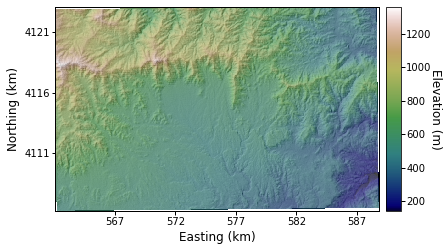

In [8]:
%matplotlib inline
Base_file = "Sorbas_SRTM30_UTM"
DataDirectory = "./"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", 
                                 save_fig=False, size_format="geomorphology")

We can also plot the slope map

Your colourbar will be located: right
xsize: 1030 and y size: 649
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: unknown
unknown
The EPSG string is: epsg:326unknow
epsg:326unknow
The EPSGString is: epsg:326unknow
minimum values are x: 562066.0 and y: 4106210.0
I made the ticks.
x labels are: 
['567', '572', '577', '582', '587']
x locations are:
[567000.0, 572000.0, 577000.0, 582000.0, 587000.0]
y labels are: 
['4111', '4116', '4121']
y locations are:
[4111000.0, 4116000.0, 4121000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1030 and y size: 649
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: unknown
unknown
The EPSG string is: epsg:326unknow
epsg:326unknow
The EPSGString is: epsg:326unknow
I am going to use the 

<Figure size 432x288 with 0 Axes>

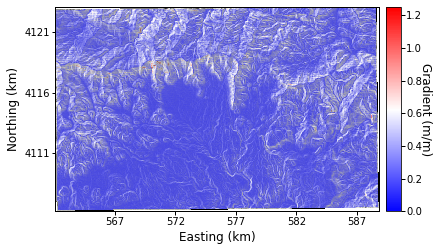

In [9]:
Base_file = "Sorbas_SRTM30_UTM"
Drape_prefix = "Sorbas_SRTM30_UTM_SLOPE"
DataDirectory = "./"
img_name2 = lsdmw.SimpleDrape(DataDirectory,Base_file, Drape_prefix, 
                              cmap = "bwr", cbar_loc = "right", 
                              cbar_label = "Gradient (m/m)",
                              save_fig=False, size_format="geomorphology",
                              colour_min_max = [0,1.25])

## Get some channel profiles

Okay, we will now run a different analysis. We will get some channel profiles. 

In [10]:
lsdtt_parameters = {"print_basin_raster" : "true",
                    "print_chi_data_maps" : "true",
                    "minimum_basin_size_pixels" : "5000"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "Sorbas_SRTM30_UTM",
                                 write_prefix= "Sorbas_SRTM30_UTM",
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: Sorbas_SRTM30_UTM
The write prefix is: Sorbas_SRTM30_UTM
The parameter dictionary is:
{'print_basin_raster': 'true', 'print_chi_data_maps': 'true', 'minimum_basin_size_pixels': '5000'}


In [11]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


Now we are going to read in the channel data using geopandas

In [12]:
df = pd.read_csv("Sorbas_SRTM30_UTM_chi_data_map.csv")
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.crs = "EPSG:4326" 
print(gdf.head())

    latitude  longitude     chi  elevation  flow_distance  drainage_area  \
0  37.222761  -2.141058  2.8794      862.0         5212.4       746140.0   
1  37.222759  -2.140764  2.8493      862.0         5186.4       750190.0   
2  37.222991  -2.140469  2.8068      861.0         5149.6       752900.0   
3  37.222989  -2.140176  2.7768      859.0         5123.6       754930.0   
4  37.222987  -2.139883  2.7469      857.0         5097.6       761020.0   

   source_key  basin_key                   geometry  
0           0          0  POINT (-2.14106 37.22276)  
1           0          0  POINT (-2.14076 37.22276)  
2           0          0  POINT (-2.14047 37.22299)  
3           0          0  POINT (-2.14018 37.22299)  
4           0          0  POINT (-2.13988 37.22299)  


In [13]:
bounds = gdf.total_bounds
print(bounds)

[-2.28430462 37.1002482  -2.00054519 37.2500372 ]


We will plot these data on a map using something called cartopy

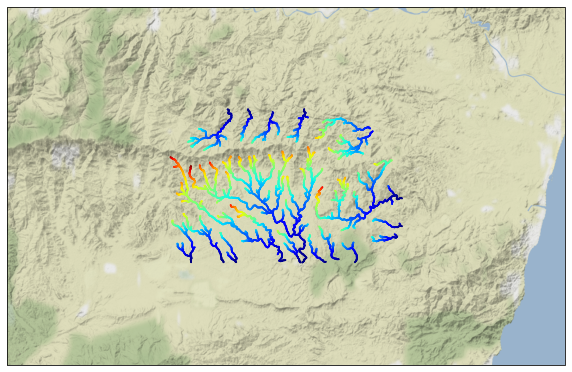

In [14]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
plt.rcParams['figure.figsize'] = [10, 10]

stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure()

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([bounds[0]-0.2, bounds[2]+0.2, bounds[1]-0.1, bounds[3]+0.1], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 11.
ax.add_image(stamen_terrain, 11)

# Add the channel data
gdf2 = gdf.to_crs(epsg=3857)    # We have to convert the data to the same 
                               #system as the ap tiles. It happens to be this one. 
                               # This epsg code is used for all map tiles (like google maps)

# IF YOU WANT TO PLOT ONE BASIN, UNCOMMENT THE LINE BELOW        
#gdf_b1 = gdf[(gdf['basin_key'] == 0)]
gdf2.plot(ax=ax, markersize=0.5, column='chi', zorder=10,cmap="jet")

Now to plot the channels in profile

<Figure size 720x720 with 0 Axes>

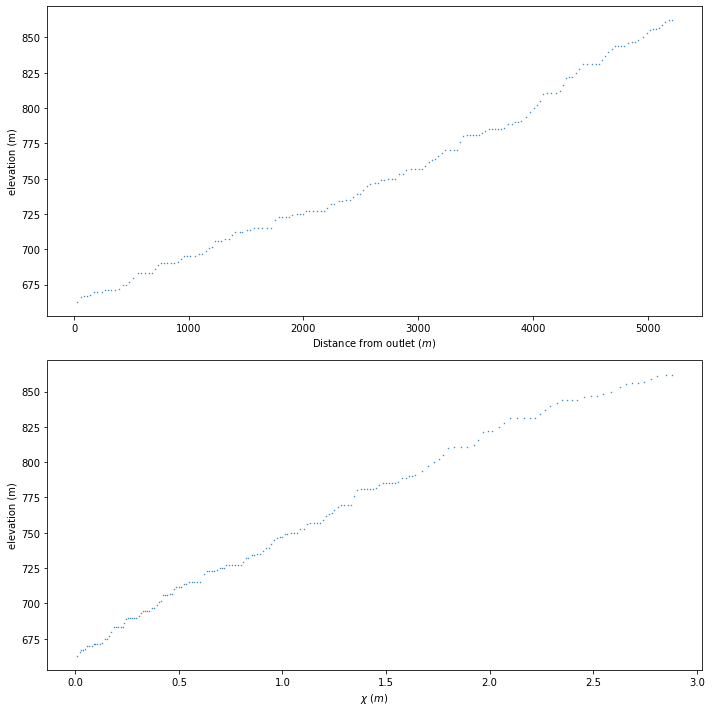

In [15]:
plt.rcParams['figure.figsize'] = [10, 10]

# First lets isolate just one of these basins. There is only basin 0 and 1
gdf_b1 = gdf[(gdf['basin_key'] == 0)]

# The main stem channel is the one with the minimum source key in this basin
min_source = np.amin(gdf_b1.source_key)
gdf_b2 = gdf_b1[(gdf_b1['source_key'] == min_source)]
#gdf_b2 = gdf_b1

# Now make channel profile plots
z = gdf_b2.elevation
x_locs = gdf_b2.flow_distance
chi = gdf_b2.chi

# Create two subplots and unpack the output array immediately
plt.clf()
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_locs, z,s = 0.2)
ax2.scatter(chi, z,s = 0.2)


ax1.set_xlabel("Distance from outlet ($m$)")
ax1.set_ylabel("elevation (m)")

ax2.set_xlabel("$\chi$ ($m$)")
ax2.set_ylabel("elevation (m)")

plt.tight_layout()

## Getting the full channel profile with steepness information

In lesson 2, we are going to work with a file that has the extension `_MChiSegmented.csv`. 
To generate this file, you need to run the following command.

**Warning**: This is quite computationally expensive so if you 

In [16]:
command_line_tool = "lsdtt-chi-mapping"
lsdtt_parameters = {"print_segmented_M_chi_map_to_csv" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(command_line_tool,read_prefix = "Sorbas_SRTM30_UTM",
                                 write_prefix= "Sorbas_SRTM30_UTM",
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-chi-mapping
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: Sorbas_SRTM30_UTM
The write prefix is: Sorbas_SRTM30_UTM
The parameter dictionary is:
{'print_segmented_M_chi_map_to_csv': 'true'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


We can use the `!ls` command to see if the file is there (the `!` tells the notebook to access the underlying linux operating system, and `ls` is a linux command that lists (`ls` is short for list) the contents of the current directory).

In [18]:
!ls

Lesson_01_getting_data_for_Spain.ipynb
Lesson_02_looking_at_the_channel_profile.ipynb
SorbasChi_MC_MChiSegmented.csv
Sorbas_SRTM30.tif
Sorbas_SRTM30_UTM.bil
Sorbas_SRTM30_UTM.bil.aux.xml
Sorbas_SRTM30_UTM.hdr
Sorbas_SRTM30_UTM_AllBasins.bil
Sorbas_SRTM30_UTM_AllBasins.hdr
Sorbas_SRTM30_UTM_AllBasinsInfo.csv
Sorbas_SRTM30_UTM_MChiSegmented.csv
Sorbas_SRTM30_UTM_SLOPE.bil
Sorbas_SRTM30_UTM_SLOPE.bil.aux.xml
Sorbas_SRTM30_UTM_SLOPE.hdr
Sorbas_SRTM30_UTM_chi_data_map.csv
Sorbas_SRTM30_UTM_hs.bil
Sorbas_SRTM30_UTM_hs.bil.aux.xml
Sorbas_SRTM30_UTM_hs.hdr
Sorbas_SRTM30_UTM_ingestedParam.param
Test_01.driver


Okay, the data is there, it is called `SorbasChi_MC_MChiSegmented.csv`. Lets load it with `geopandas`.

In [19]:
df = pd.read_csv("Sorbas_SRTM30_UTM_MChiSegmented.csv")
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.crs = "EPSG:4326" 
print(gdf.head())

     node  row  col   latitude  longitude     chi  elevation  flow_distance  \
0  119448  121  543  37.222761  -2.141058  2.8794      862.0         5212.4   
1  119449  121  544  37.222759  -2.140764  2.8493      862.0         5186.4   
2  118427  120  545  37.222991  -2.140469  2.8068      861.0         5149.6   
3  118428  120  546  37.222989  -2.140176  2.7768      859.0         5123.6   
4  118429  120  547  37.222987  -2.139883  2.7469      857.0         5097.6   

   drainage_area   m_chi   b_chi  source_key  basin_key  segmented_elevation  \
0       746140.0  72.045  671.93           0          0               879.38   
1       750190.0  71.979  671.87           0          0               876.96   
2       752900.0  72.009  672.17           0          0               874.28   
3       754930.0  72.123  671.79           0          0               872.06   
4       761020.0  71.590  672.50           0          0               869.15   

                    geometry  
0  POINT (-2.

Lets plot the points

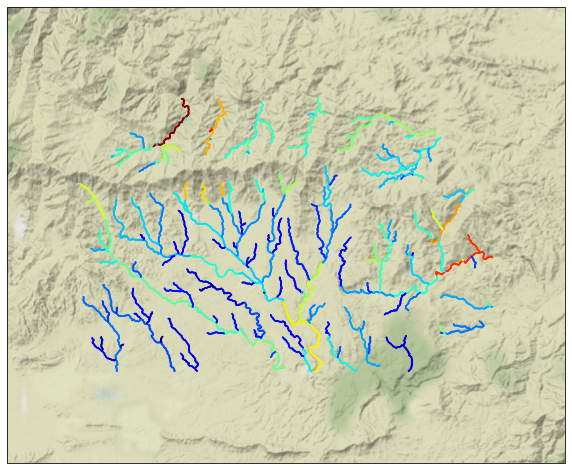

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
plt.rcParams['figure.figsize'] = [10, 10]


bounds = gdf.total_bounds
stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure()

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([bounds[0]-0.05, bounds[2]+0.05, bounds[1]-0.05, bounds[3]+0.05], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 11.
ax.add_image(stamen_terrain, 11)

# Add the channel data
gdf2 = gdf.to_crs(epsg=3857)    # We have to convert the data to the same 
                               #system as the ap tiles. It happens to be this one. 
                               # This epsg code is used for all map tiles (like google maps)

# IF YOU WANT TO PLOT ONE BASIN, UNCOMMENT THE LINE BELOW        
#gdf_b1 = gdf[(gdf['basin_key'] == 0)]
gdf2.plot(ax=ax, markersize=0.5, column='m_chi', zorder=10,cmap="jet")